In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hot = pd.read_csv('hot100_features.csv')
not_hot=pd.read_csv('not_hot_features.csv')

In [3]:
display(hot.head())
not_hot.tail()

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Kill Bill,SZA,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
1,Last Night,Morgan Wallen,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,0.1510,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.1400,0.000000,0.1010,0.742,147.991,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,0.0837,0.834,147.989,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3


,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
2989,Goin' Back,The Byrds,0.496,0.449,4,-10.230,1,0.0277,0.3640,0.000008,0.1200,0.547,116.181,audio_features,6mM3QPK502fHwOYaj6ELmm,spotify:track:6mM3QPK502fHwOYaj6ELmm,https://api.spotify.com/v1/tracks/6mM3QPK502fH...,https://api.spotify.com/v1/audio-analysis/6mM3...,205840,4
2990,Dr. Mabuse,Propaganda,0.590,0.948,0,-9.541,0,0.0318,0.1580,0.565000,0.3030,0.653,107.558,audio_features,5JE5gkxYH1KC12WYVZptC3,spotify:track:5JE5gkxYH1KC12WYVZptC3,https://api.spotify.com/v1/tracks/5JE5gkxYH1KC...,https://api.spotify.com/v1/audio-analysis/5JE5...,302560,4
2991,I'll Be You,The Replacements,0.591,0.860,7,-5.986,1,0.0319,0.0058,0.000013,0.4110,0.600,129.412,audio_features,4J5VFtuLhbgKhz6UKkABXR,spotify:track:4J5VFtuLhbgKhz6UKkABXR,https://api.spotify.com/v1/tracks/4J5VFtuLhbgK...,https://api.spotify.com/v1/audio-analysis/4J5V...,209387,4
2992,Someday We'll Be Together,Diana Ross and The Supremes,0.678,0.535,1,-12.454,1,0.0329,0.1400,0.000002,0.0596,0.795,107.041,audio_features,79Yk6AlSKi5dxDFINID2hS,spotify:track:79Yk6AlSKi5dxDFINID2hS,https://api.spotify.com/v1/tracks/79Yk6AlSKi5d...,https://api.spotify.com/v1/audio-analysis/79Yk...,211667,4
2993,What Does Your Soul Look Like?,DJ Shadow,0.512,0.707,4,-8.483,0,0.0306,0.4960,0.906000,0.1790,0.602,142.032,audio_features,0GLer8jmxlhDOtKPuRQhMz,spotify:track:0GLer8jmxlhDOtKPuRQhMz,https://api.spotify.com/v1/tracks/0GLer8jmxlhD...,https://api.spotify.com/v1/audio-analysis/0GLe...,302293,4


In [4]:
not_hot.sort_values(by="id")['id'].value_counts()

2Di0qFNb7ATroCGB3q0Ka7    7
2QfiRTz5Yc8DdShCxG1tB2    7
3qiyyUfYe7CRYLucrPmulD    7
7cdlPfu77tOqnzWwGJ19s1    6
1CapNlKgeOWlBEE54CRamd    5
                         ..
2c7huQpWR29bcXrrvLcG2j    1
2cWHN0WK52RGAWHgaDamUA    1
2ccUQnjjNWT0rsNnsBpsCA    1
2cdzutoqFK6sfW6exi7oXh    1
7ziicmUOzWXAkdPriOmFk9    1
Name: id, Length: 2845, dtype: int64

In [5]:
not_hot.drop_duplicates(subset=['id'], keep='first', inplace=True, ignore_index=True)
display(not_hot.shape)
not_hot.tail()

(2845, 20)

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
2840,Goin' Back,The Byrds,0.496,0.449,4,-10.230,1,0.0277,0.3640,0.000008,0.1200,0.547,116.181,audio_features,6mM3QPK502fHwOYaj6ELmm,spotify:track:6mM3QPK502fHwOYaj6ELmm,https://api.spotify.com/v1/tracks/6mM3QPK502fH...,https://api.spotify.com/v1/audio-analysis/6mM3...,205840,4
2841,Dr. Mabuse,Propaganda,0.590,0.948,0,-9.541,0,0.0318,0.1580,0.565000,0.3030,0.653,107.558,audio_features,5JE5gkxYH1KC12WYVZptC3,spotify:track:5JE5gkxYH1KC12WYVZptC3,https://api.spotify.com/v1/tracks/5JE5gkxYH1KC...,https://api.spotify.com/v1/audio-analysis/5JE5...,302560,4
2842,I'll Be You,The Replacements,0.591,0.860,7,-5.986,1,0.0319,0.0058,0.000013,0.4110,0.600,129.412,audio_features,4J5VFtuLhbgKhz6UKkABXR,spotify:track:4J5VFtuLhbgKhz6UKkABXR,https://api.spotify.com/v1/tracks/4J5VFtuLhbgK...,https://api.spotify.com/v1/audio-analysis/4J5V...,209387,4
2843,Someday We'll Be Together,Diana Ross and The Supremes,0.678,0.535,1,-12.454,1,0.0329,0.1400,0.000002,0.0596,0.795,107.041,audio_features,79Yk6AlSKi5dxDFINID2hS,spotify:track:79Yk6AlSKi5dxDFINID2hS,https://api.spotify.com/v1/tracks/79Yk6AlSKi5d...,https://api.spotify.com/v1/audio-analysis/79Yk...,211667,4
2844,What Does Your Soul Look Like?,DJ Shadow,0.512,0.707,4,-8.483,0,0.0306,0.4960,0.906000,0.1790,0.602,142.032,audio_features,0GLer8jmxlhDOtKPuRQhMz,spotify:track:0GLer8jmxlhDOtKPuRQhMz,https://api.spotify.com/v1/tracks/0GLer8jmxlhD...,https://api.spotify.com/v1/audio-analysis/0GLe...,302293,4


In [6]:
y_lst = ["Yes"]*100

hot['hot'] = y_lst

display(hot['hot'].isna().sum())

0

In [7]:
n_lst = ["No"]*2845
not_hot['hot'] = n_lst

In [8]:
data = pd.concat([hot,not_hot],axis=0)
data = data.reset_index(drop=True)

data.tail()

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hot
2940,Goin' Back,The Byrds,0.496,0.449,4,-10.230,1,0.0277,0.3640,0.000008,...,0.547,116.181,audio_features,6mM3QPK502fHwOYaj6ELmm,spotify:track:6mM3QPK502fHwOYaj6ELmm,https://api.spotify.com/v1/tracks/6mM3QPK502fH...,https://api.spotify.com/v1/audio-analysis/6mM3...,205840,4,No
2941,Dr. Mabuse,Propaganda,0.590,0.948,0,-9.541,0,0.0318,0.1580,0.565000,...,0.653,107.558,audio_features,5JE5gkxYH1KC12WYVZptC3,spotify:track:5JE5gkxYH1KC12WYVZptC3,https://api.spotify.com/v1/tracks/5JE5gkxYH1KC...,https://api.spotify.com/v1/audio-analysis/5JE5...,302560,4,No
2942,I'll Be You,The Replacements,0.591,0.860,7,-5.986,1,0.0319,0.0058,0.000013,...,0.600,129.412,audio_features,4J5VFtuLhbgKhz6UKkABXR,spotify:track:4J5VFtuLhbgKhz6UKkABXR,https://api.spotify.com/v1/tracks/4J5VFtuLhbgK...,https://api.spotify.com/v1/audio-analysis/4J5V...,209387,4,No
2943,Someday We'll Be Together,Diana Ross and The Supremes,0.678,0.535,1,-12.454,1,0.0329,0.1400,0.000002,...,0.795,107.041,audio_features,79Yk6AlSKi5dxDFINID2hS,spotify:track:79Yk6AlSKi5dxDFINID2hS,https://api.spotify.com/v1/tracks/79Yk6AlSKi5d...,https://api.spotify.com/v1/audio-analysis/79Yk...,211667,4,No
2944,What Does Your Soul Look Like?,DJ Shadow,0.512,0.707,4,-8.483,0,0.0306,0.4960,0.906000,...,0.602,142.032,audio_features,0GLer8jmxlhDOtKPuRQhMz,spotify:track:0GLer8jmxlhDOtKPuRQhMz,https://api.spotify.com/v1/tracks/0GLer8jmxlhD...,https://api.spotify.com/v1/audio-analysis/0GLe...,302293,4,No


In [9]:
data_num = data.select_dtypes(np.number)
data_num.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947,4
1,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855,4
2,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,4
3,0.898,0.676,9,-5.196,1,0.1870,0.1400,0.000000,0.1010,0.742,147.991,172125,4
4,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,0.0837,0.834,147.989,165671,3


In [10]:
X = data_num.drop(columns=["key","mode","duration_ms","time_signature"])
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980
1,0.517,0.675,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853
2,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999
3,0.898,0.676,-5.196,0.1870,0.1400,0.000000,0.1010,0.742,147.991
4,0.668,0.758,-5.176,0.0332,0.4830,0.000019,0.0837,0.834,147.989


In [11]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "scaler.pickle" # Path with filename

#saving the scaler:
with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head()) #before scaling
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980
1,0.517,0.675,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853
2,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999
3,0.898,0.676,-5.196,0.1870,0.1400,0.000000,0.1010,0.742,147.991
4,0.668,0.758,-5.176,0.0332,0.4830,0.000019,0.0837,0.834,147.989


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.367172,0.478560,0.870971,-0.447215,-0.777661,0.270000,-0.190641,-0.819369,-1.171999
1,-0.384922,0.218363,0.961484,-0.492065,0.524593,-0.390395,-0.251901,-0.404965,2.908564
2,0.740258,0.244383,1.223598,-0.081814,-0.742137,-0.390371,-0.979671,0.125473,-0.141175
3,1.871360,0.222700,1.007608,1.503787,-0.496344,-0.390395,-0.558201,0.523301,0.924213
4,0.509300,0.578302,1.012567,-0.525044,0.601403,-0.390308,-0.664181,0.904553,0.924142


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(10,19)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))

Training a K-Means model with 10 clusters! 

Initialization complete
Iteration 0, inertia 16124.487128904388
Iteration 1, inertia 12982.426177900872
Iteration 2, inertia 12505.258513142338
Iteration 3, inertia 12264.614353008086
Iteration 4, inertia 12114.704817536161
Iteration 5, inertia 12022.850624092565
Iteration 6, inertia 11970.745803481917
Iteration 7, inertia 11945.049183581938
Iteration 8, inertia 11919.592908909344
Iteration 9, inertia 11889.069081509107
Iteration 10, inertia 11861.963642802839
Iteration 11, inertia 11838.462409184915
Iteration 12, inertia 11823.066311076842
Iteration 13, inertia 11809.945236601332
Iteration 14, inertia 11799.044673062494
Iteration 15, inertia 11789.354971521137
Iteration 16, inertia 11782.082232221626
Iteration 17, inertia 11776.702147543978
Iteration 18, inertia 11774.465193866281
Iteration 19, inertia 11773.083332357233
Iteration 20, inertia 11771.91785253341
Iteration 21, inertia 11770.366489384496
Iteration 22, inertia 11769.802888054799

Iteration 5, inertia 12213.320433711137
Iteration 6, inertia 12162.564894067396
Iteration 7, inertia 12120.930450803673
Iteration 8, inertia 12088.742241021955
Iteration 9, inertia 12066.921816200924
Iteration 10, inertia 12053.95683550158
Iteration 11, inertia 12045.278522046776
Iteration 12, inertia 12037.68498002299
Iteration 13, inertia 12033.244212056468
Iteration 14, inertia 12030.619193149305
Iteration 15, inertia 12028.623356083079
Iteration 16, inertia 12027.250477290643
Iteration 17, inertia 12025.600927672509
Iteration 18, inertia 12024.110833769635
Iteration 19, inertia 12022.693434619285
Iteration 20, inertia 12021.44161398887
Iteration 21, inertia 12020.108252109549
Iteration 22, inertia 12019.291599120661
Iteration 23, inertia 12018.935355397773
Iteration 24, inertia 12018.593519830096
Iteration 25, inertia 12018.202628069463
Iteration 26, inertia 12018.086339580805
Converged at iteration 26: center shift 5.1034794130873304e-05 within tolerance 0.00010000000000000005.
In

Iteration 7, inertia 11990.320335873674
Iteration 8, inertia 11973.730118146877
Iteration 9, inertia 11959.004705479792
Iteration 10, inertia 11944.300615884957
Iteration 11, inertia 11935.046678954484
Iteration 12, inertia 11925.3560616919
Iteration 13, inertia 11913.171220822867
Iteration 14, inertia 11903.996961000606
Iteration 15, inertia 11891.866139146961
Iteration 16, inertia 11871.544324138147
Iteration 17, inertia 11845.286498753892
Iteration 18, inertia 11806.837678410522
Iteration 19, inertia 11752.774508288257
Iteration 20, inertia 11680.689200089671
Iteration 21, inertia 11611.49339854399
Iteration 22, inertia 11549.989490986158
Iteration 23, inertia 11514.048097420777
Iteration 24, inertia 11492.937773429225
Iteration 25, inertia 11482.429491454412
Iteration 26, inertia 11477.924514109702
Iteration 27, inertia 11475.040979597672
Iteration 28, inertia 11474.08124035253
Iteration 29, inertia 11473.521761839964
Iteration 30, inertia 11473.049137513117
Iteration 31, inertia 1

Iteration 39, inertia 11051.363140375852
Iteration 40, inertia 11050.884592845387
Iteration 41, inertia 11050.504596962257
Iteration 42, inertia 11050.263523829177
Iteration 43, inertia 11050.19926891787
Converged at iteration 43: strict convergence.
Initialization complete
Iteration 0, inertia 15212.285805145166
Iteration 1, inertia 12163.5217003686
Iteration 2, inertia 11713.805851977007
Iteration 3, inertia 11526.505841390017
Iteration 4, inertia 11463.136682898627
Iteration 5, inertia 11427.582614865554
Iteration 6, inertia 11400.92597317733
Iteration 7, inertia 11382.329682055948
Iteration 8, inertia 11366.053259225719
Iteration 9, inertia 11348.52556851627
Iteration 10, inertia 11329.493948649448
Iteration 11, inertia 11308.18873563712
Iteration 12, inertia 11292.422167450295
Iteration 13, inertia 11280.113719325316
Iteration 14, inertia 11270.202899512495
Iteration 15, inertia 11260.373296887408
Iteration 16, inertia 11251.560898134043
Iteration 17, inertia 11243.524408274621
It

Iteration 38, inertia 10944.34833324383
Iteration 39, inertia 10931.314101083104
Iteration 40, inertia 10926.729994985724
Iteration 41, inertia 10919.342326237891
Iteration 42, inertia 10911.996225200564
Iteration 43, inertia 10902.987176070017
Iteration 44, inertia 10892.320142895078
Iteration 45, inertia 10881.436648972529
Iteration 46, inertia 10873.433254793177
Iteration 47, inertia 10867.369956583467
Iteration 48, inertia 10863.64763083075
Iteration 49, inertia 10860.984808418434
Iteration 50, inertia 10859.137311033168
Iteration 51, inertia 10857.286174858276
Iteration 52, inertia 10855.247005021383
Iteration 53, inertia 10853.647796462614
Iteration 54, inertia 10853.043476252622
Iteration 55, inertia 10852.575526371254
Iteration 56, inertia 10852.367265212315
Iteration 57, inertia 10852.08422313404
Iteration 58, inertia 10851.925136065935
Iteration 59, inertia 10851.73645672794
Iteration 60, inertia 10851.480618887728
Iteration 61, inertia 10851.259343371796
Iteration 62, inerti

Iteration 37, inertia 10521.153927189685
Iteration 38, inertia 10520.331271483123
Iteration 39, inertia 10519.716518570982
Iteration 40, inertia 10519.234226691868
Iteration 41, inertia 10518.734721024908
Iteration 42, inertia 10517.866991832369
Iteration 43, inertia 10517.096179224009
Iteration 44, inertia 10516.527098503764
Iteration 45, inertia 10516.008386502694
Iteration 46, inertia 10515.159519878427
Iteration 47, inertia 10513.975854578135
Iteration 48, inertia 10513.36061194867
Iteration 49, inertia 10513.048762393128
Iteration 50, inertia 10512.878436674604
Converged at iteration 50: strict convergence.
Initialization complete
Iteration 0, inertia 15179.159387661437
Iteration 1, inertia 11750.233373795523
Iteration 2, inertia 11377.405349246617
Iteration 3, inertia 11170.646296988209
Iteration 4, inertia 11033.4317143016
Iteration 5, inertia 10945.728960706168
Iteration 6, inertia 10859.181983080292
Iteration 7, inertia 10777.143476908768
Iteration 8, inertia 10733.32538789131

Iteration 0, inertia 14511.802720236929
Iteration 1, inertia 11825.809712212242
Iteration 2, inertia 11329.485410054562
Iteration 3, inertia 11132.516254250288
Iteration 4, inertia 11017.354883251235
Iteration 5, inertia 10964.634889098556
Iteration 6, inertia 10919.032508129343
Iteration 7, inertia 10878.067633165982
Iteration 8, inertia 10839.62818472616
Iteration 9, inertia 10806.551313979868
Iteration 10, inertia 10767.917768216359
Iteration 11, inertia 10729.02891159927
Iteration 12, inertia 10685.466777741622
Iteration 13, inertia 10614.05798266802
Iteration 14, inertia 10531.07764562605
Iteration 15, inertia 10465.603880424756
Iteration 16, inertia 10422.080167495342
Iteration 17, inertia 10396.987593062011
Iteration 18, inertia 10377.275721174985
Iteration 19, inertia 10368.844868348464
Iteration 20, inertia 10364.146991791311
Iteration 21, inertia 10361.3099030113
Iteration 22, inertia 10359.273605336868
Iteration 23, inertia 10358.266265880775
Iteration 24, inertia 10357.3138

Iteration 5, inertia 10282.796826538135
Iteration 6, inertia 10238.932274370229
Iteration 7, inertia 10212.254909735046
Iteration 8, inertia 10198.573014621
Iteration 9, inertia 10190.697079754158
Iteration 10, inertia 10185.038945598877
Iteration 11, inertia 10180.301680273638
Iteration 12, inertia 10176.25232173177
Iteration 13, inertia 10172.47712976906
Iteration 14, inertia 10169.14770391005
Iteration 15, inertia 10166.49992661636
Iteration 16, inertia 10163.378435109267
Iteration 17, inertia 10160.221873863531
Iteration 18, inertia 10154.853512949185
Iteration 19, inertia 10149.796413335926
Iteration 20, inertia 10145.675280942325
Iteration 21, inertia 10139.940160483438
Iteration 22, inertia 10134.341382023378
Iteration 23, inertia 10130.22054237562
Iteration 24, inertia 10126.694209178793
Iteration 25, inertia 10124.01841329872
Iteration 26, inertia 10121.34017250643
Iteration 27, inertia 10118.887821171495
Iteration 28, inertia 10117.115280796224
Iteration 29, inertia 10114.979

Iteration 15, inertia 9900.726740514463
Iteration 16, inertia 9895.696555075536
Iteration 17, inertia 9892.298379471938
Iteration 18, inertia 9891.1315237263
Iteration 19, inertia 9890.816523670575
Iteration 20, inertia 9890.688093246028
Iteration 21, inertia 9890.464367884706
Iteration 22, inertia 9889.915538376086
Iteration 23, inertia 9889.418855610129
Iteration 24, inertia 9889.079375036023
Iteration 25, inertia 9888.888898437517
Iteration 26, inertia 9888.665831611577
Converged at iteration 26: strict convergence.
Initialization complete
Iteration 0, inertia 13174.132865310785
Iteration 1, inertia 10550.824084391024
Iteration 2, inertia 10225.021407155824
Iteration 3, inertia 10099.502002984658
Iteration 4, inertia 10025.776590542908
Iteration 5, inertia 9965.87702229555
Iteration 6, inertia 9930.027705036828
Iteration 7, inertia 9908.848544978437
Iteration 8, inertia 9892.45047306101
Iteration 9, inertia 9881.544124625321
Iteration 10, inertia 9877.454978045498
Iteration 11, iner

Iteration 7, inertia 9907.868102329774
Iteration 8, inertia 9891.780851027834
Iteration 9, inertia 9879.603424832309
Iteration 10, inertia 9871.147445225744
Iteration 11, inertia 9863.870417484142
Iteration 12, inertia 9855.102784213019
Iteration 13, inertia 9846.111670240387
Iteration 14, inertia 9838.356443790004
Iteration 15, inertia 9833.010955712642
Iteration 16, inertia 9826.370494656489
Iteration 17, inertia 9819.900102968351
Iteration 18, inertia 9814.224545601786
Iteration 19, inertia 9808.154857417489
Iteration 20, inertia 9802.885146477238
Iteration 21, inertia 9799.986558290908
Iteration 22, inertia 9797.569203730074
Iteration 23, inertia 9792.682551398264
Iteration 24, inertia 9787.480542950052
Iteration 25, inertia 9784.240407960082
Iteration 26, inertia 9778.3043824253
Iteration 27, inertia 9773.203993403951
Iteration 28, inertia 9769.73672461014
Iteration 29, inertia 9767.479622606366
Iteration 30, inertia 9766.898531740551
Iteration 31, inertia 9765.10802397878
Iterati

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

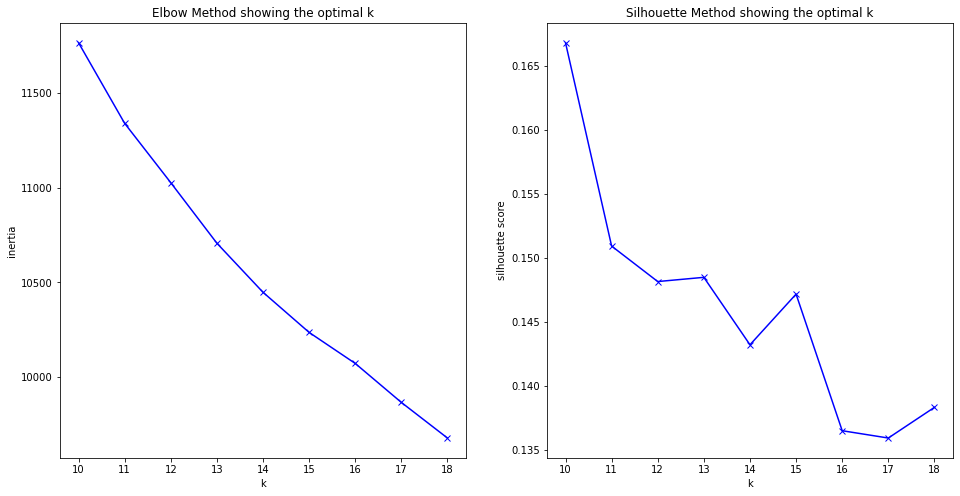

In [13]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [14]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [15]:
best_model = load("kmeans_14.pickle")

In [16]:
clusters = best_model.predict(X_scaled_df)

In [17]:
X_scaled_df['cluster'] = clusters 
display(X_scaled_df.head())
X_scaled_df['cluster'].value_counts()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.367172,0.478560,0.870971,-0.447215,-0.777661,0.270000,-0.190641,-0.819369,-1.171999,1
1,-0.384922,0.218363,0.961484,-0.492065,0.524593,-0.390395,-0.251901,-0.404965,2.908564,4
2,0.740258,0.244383,1.223598,-0.081814,-0.742137,-0.390371,-0.979671,0.125473,-0.141175,5
3,1.871360,0.222700,1.007608,1.503787,-0.496344,-0.390395,-0.558201,0.523301,0.924213,11
4,0.509300,0.578302,1.012567,-0.525044,0.601403,-0.390308,-0.664181,0.904553,0.924142,5


5     375
10    308
3     302
1     296
0     268
4     216
8     209
6     190
7     182
11    178
13    162
2     150
9      60
12     49
Name: cluster, dtype: int64

In [18]:
X_scaled_df = X_scaled_df.drop(columns='cluster')

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score

In [20]:
model = DBSCAN()
yhat = model.fit_predict(X_scaled_df)
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

The Silhouette score of the model is:  -0.17


In [21]:
d = distance_matrix(X_scaled_df,X_scaled_df)
print(d)
print()

[[0.         4.42741626 1.86202581 ... 2.41661339 2.70540708 4.41295809]
 [4.42741626 0.         3.63596467 ... 3.55094258 4.34219872 4.78195098]
 [1.86202581 3.63596467 0.         ... 2.65996162 2.30548666 4.83638099]
 ...
 [2.41661339 3.55094258 2.65996162 ... 0.         3.30569695 4.7946265 ]
 [2.70540708 4.34219872 2.30548666 ... 3.30569695 0.         4.87595637]
 [4.41295809 4.78195098 4.83638099 ... 4.7946265  4.87595637 0.        ]]



In [22]:
d2 = np.sort(d)[:,1:]
print(d2)

[[ 0.81105842  0.89157659  0.9222692  ... 12.15128445 12.23221872
  15.62514256]
 [ 1.29222128  1.43649115  1.64799914 ... 12.14840885 13.05675563
  16.56296717]
 [ 0.72028462  0.80303324  0.85085658 ... 11.9407613  12.71774785
  16.02367331]
 ...
 [ 0.61925577  0.64903237  0.64903237 ... 12.48247549 12.56452558
  16.03603373]
 [ 0.55442605  0.56452181  0.68126613 ... 11.00946416 12.17743929
  14.2172826 ]
 [ 1.16211085  1.32407284  1.47924012 ... 10.53009904 13.21933223
  14.71406209]]


In [23]:
f = d2[:,17]
f_final = np.sort(f)[::-1]
print()
print(f_final)


[11.85544749  7.65401249  7.06622888 ...  0.80680662  0.79968964
  0.79195888]


C:\Users\user\AppData\Local\Temp\ipykernel_10244\270027386.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


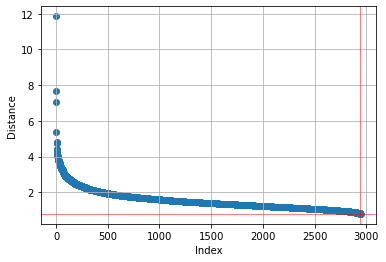

In [24]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(b=True)
plt.show()

In [25]:
models = {}

for value in np.arange(1.8,4,0.1):
    model = DBSCAN(eps=value, min_samples=18) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(X_scaled_df)
    score =  round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

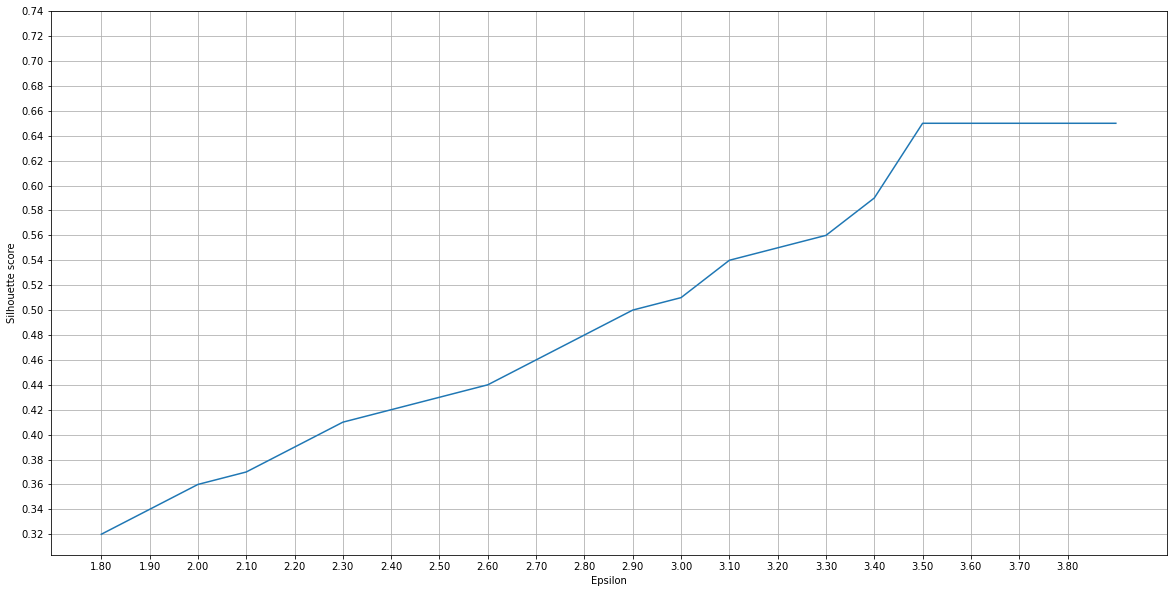

In [26]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(1.8, 4, 0.1)]
scores = [item[1]["score"] for item in list(models.items())]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.show()

In [27]:
best_model = load("kmeans_14.pickle")
clusters = best_model.predict(X_scaled_df)
data['cluster']= clusters

data.head()

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hot,cluster
0,Kill Bill,SZA,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,...,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,Yes,1
1,Last Night,Morgan Wallen,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,...,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,Yes,4
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,...,117.999,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,Yes,5
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.1400,0.000000,...,147.991,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,Yes,11
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,...,147.989,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,Yes,5


In [133]:
data.to_csv('all_songs.csv',index=False)

In [30]:
from config import *
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret_id))

In [134]:
def song_recommendation():
    artist = input("Please enter the artist: ")
    title = input("Please enter the song title: ")
    try: 
        string = "tracks: " + title + "artist: " + artist
        song=sp.search(q=string,limit=5)
        song_id = [song['tracks']['items'][0]['id']]
        artist_name = song['tracks']['items'][0]['album']['artists'][0]['name']
        song_name = [song['tracks']['items'][0]['name']]
        print(song_name)
        print(artist_name)
    except:
        print("Song not found!")
  
    while True:
        try:
            choice = int(input("Please type a number to choose the version you want: "))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
            
        if (choice <= 0) or (choice>len(song_id)):
            print("Sorry, your response must be within the 0 and ", len(song_id)+1)
            continue
        else:
            break
    if song_id[choice-1] in list(data['id']):
        print("Song exists!")
        cluster = list(data['cluster'][data['Title']==title])[0]
        print(cluster)
        if list(data['hot'][data['id']==song_id[choice-1]])[0] == 'Yes':
            lst = [data['Title'][(data['hot']=='Yes') & (data['cluster']==cluster)].sample(5)]
        else: 
            lst = [data['Title'][(data['hot']=='No') & (data['cluster']==cluster)].sample(5)]
        return lst
    else: 
        print("Sorry! Song not found in our system! We will update our system asap.")

In [132]:
song_recommendation()

Please enter the artist: SZA
Please enter the song title: Kill Bill
['Kill Bill']
SZA
Please type a number to choose the version you want: 3
Sorry, your response must be within the 0 and  2
Please type a number to choose the version you want: 1
Song exists!
1


[0              Kill Bill
 63     Everything I Love
 84            Like Crazy
 48    Heart Like A Truck
 12              Chemical
 Name: Title, dtype: object]